In [383]:
import pandas as pd
import matplotlib.pyplot as plt

In [384]:
s21fe = pd.read_csv("dataset/samsung_s21fe-data.csv")
pixel6a = pd.read_csv("dataset/pixel_6a-data.csv")
a70 = pd.read_csv("dataset/samsung_a70-data.csv")
pixel4a = pd.read_csv("dataset/pixel_4a-data.csv")

converting a feature to date time


In [385]:
s21fe["timestamp"] = pd.to_datetime(s21fe["timestamp"])
pixel4a["timestamp"] = pd.to_datetime(pixel4a["timestamp"])
pixel6a["timestamp"] = pd.to_datetime(pixel6a["timestamp"])
a70["timestamp"] = pd.to_datetime(a70["timestamp"])

In [386]:
s21fe.drop(range(4326,4464),inplace=True)
s21fe.reset_index(drop=True, inplace=True)

In [387]:
a70.loc[a70["battery_percent"] == 100]

,timestamp,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh),battery_technology
4679,2023-04-14 19:00:46.508,4.294,609,2.615046,100,37.2,3121.2,4400,Li-ion
4680,2023-04-14 19:00:47.561,4.294,607,2.606458,100,37.1,3121.2,4400,Li-ion
4681,2023-04-14 19:00:48.619,4.294,610,2.619340,100,37.1,3121.2,4400,Li-ion
4682,2023-04-14 19:00:49.665,4.294,607,2.606458,100,37.1,3121.2,4400,Li-ion
4683,2023-04-14 19:00:50.827,4.294,608,2.610752,100,37.1,3121.2,4400,Li-ion
4684,2023-04-14 19:00:51.870,4.294,609,2.615046,100,37.1,3121.2,4400,Li-ion
4685,2023-04-14 19:00:53.524,4.294,399,1.713306,100,37.1,3121.2,4400,Li-ion


Dropping extra rows of 100% battery

In [388]:
a70.drop(range(4684,4686),inplace=True)
a70.reset_index(drop=True, inplace=True)

In [389]:
pixel4a.drop(range(2797,2889),inplace=True)
pixel4a.reset_index(drop=True, inplace=True)

In [390]:
pixel6a.drop(range(3034,3332),inplace=True)
pixel6a.reset_index(drop=True, inplace=True)

In [391]:
t1 = s21fe.iloc[0,0]
t2 = a70.iloc[0,0]
t3 = pixel4a.iloc[0,0]
t4 = pixel6a.iloc[0,0]

In [392]:
time1 = []
for index,row in s21fe.iterrows() :
    time1.append(row['timestamp']-t1)
s21fe["time_elasped"] = time1

In [393]:
time2 = []
for index,row in a70.iterrows() :
    time2.append(row['timestamp']-t2)
a70["time_elasped"] = time2

In [394]:
time3 = []
for index,row in pixel4a.iterrows() :
    time3.append(row['timestamp']-t3)
pixel4a["time_elasped"] = time3

In [395]:
time4 = []
for index,row in pixel6a.iterrows() :
    time4.append(row['timestamp']-t4)
pixel6a["time_elasped"] = time4

In [396]:
pixel6a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   timestamp                      3034 non-null   datetime64[ns] 
 1   voltage(V)                     3034 non-null   float64        
 2   current(mA)                    3034 non-null   int64          
 3   power(W)                       3034 non-null   float64        
 4   battery_percent                3034 non-null   int64          
 5   battery_temperature(Celsius)   3034 non-null   float64        
 6   remaining_battery_charge(mAh)  3034 non-null   int64          
 7   battery_capacity(mAh)          3034 non-null   int64          
 8   battery_technology             3034 non-null   object         
 9   time_elasped                   3034 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(1), timedelta64[ns](1

In [397]:
pixel6a.tail()

,timestamp,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh),battery_technology,time_elasped
3029,2023-04-14 21:22:06.119,4.435,448,1.987434,100,33.4,4386,4410,Li-ion,0 days 01:51:57.635000
3030,2023-04-14 21:22:07.147,4.435,444,1.969415,100,33.4,4386,4410,Li-ion,0 days 01:51:58.663000
3031,2023-04-14 21:22:08.178,4.435,452,2.006838,100,33.4,4388,4410,Li-ion,0 days 01:51:59.694000
3032,2023-04-14 21:22:09.207,4.435,432,1.919521,100,33.4,4388,4410,Li-ion,0 days 01:52:00.723000
3033,2023-04-14 21:22:10.248,4.435,442,1.961099,100,33.4,4388,4410,Li-ion,0 days 01:52:01.764000


In [398]:
s21fe.head()

,timestamp,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh),battery_technology,time_elasped
0,2023-04-14 13:05:45.846,3.36,1595,5.35920,1,37.1,0.0,4370,Li-ion,0 days 00:00:00
1,2023-04-14 13:05:47.004,3.36,1434,4.81824,1,37.1,0.0,4370,Li-ion,0 days 00:00:01.158000
2,2023-04-14 13:05:48.050,3.36,565,1.89840,1,37.1,0.0,4370,Li-ion,0 days 00:00:02.204000
3,2023-04-14 13:05:49.085,3.36,1654,5.55744,1,37.1,0.0,4370,Li-ion,0 days 00:00:03.239000
4,2023-04-14 13:05:50.110,3.36,884,2.97024,1,37.1,0.0,4370,Li-ion,0 days 00:00:04.264000


S21 FE Time vs Current Graph


In [399]:
'''import datetime
import pylab as plt
import numpy as np
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 300)  # 5 minutes
y = np.random.random(len(x))
ax.plot(x, y)
ax.plot(x, y)

def timeTicks(x, pos):
    d = datetime.timedelta(seconds=x)
    return str(d)
formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)
plt.show()
#It uses pythons timedelta. With 864000 seconds the above will result in "10 days, 10:00:00". You can of course stuff more advanced #formatting into the timeTicks() function above'''

'import datetime\nimport pylab as plt\nimport numpy as np\nimport matplotlib\n\nfig = plt.figure()\nax = fig.add_subplot(111)\nx = np.linspace(0, 300)  # 5 minutes\ny = np.random.random(len(x))\nax.plot(x, y)\nax.plot(x, y)\n\ndef timeTicks(x, pos):\n    d = datetime.timedelta(seconds=x)\n    return str(d)\nformatter = matplotlib.ticker.FuncFormatter(timeTicks)\nax.xaxis.set_major_formatter(formatter)\nplt.show()\n#It uses pythons timedelta. With 864000 seconds the above will result in "10 days, 10:00:00". You can of course stuff more advanced #formatting into the timeTicks() function above'

Text(0, 0.5, 'Current (mA)')

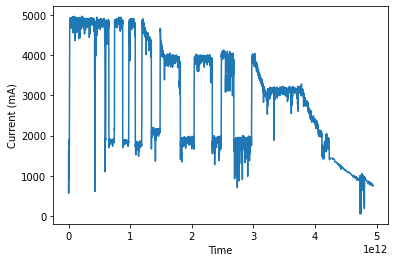

In [400]:
x = s21fe["time_elasped"]
y = s21fe["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Current (mA)")

S21 FE Time vs Voltage Graph


Text(0, 0.5, 'Voltage(V)')

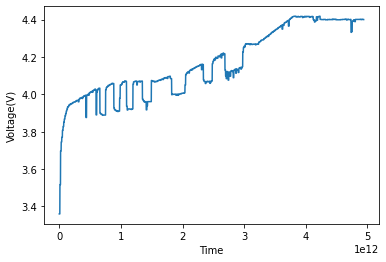

In [401]:
x = s21fe["time_elasped"]
y = s21fe["voltage(V)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Voltage(V)")

S21 FE Time vs Power Graph


Text(0, 0.5, 'Power(W)')

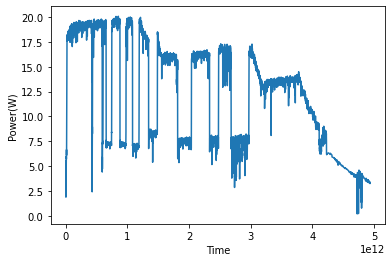

In [402]:
x = s21fe["time_elasped"]
y = s21fe["power(W)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Power(W)")

S21 FE Time vs Temperature Graph


Text(0, 0.5, 'temperature(Celsius)')

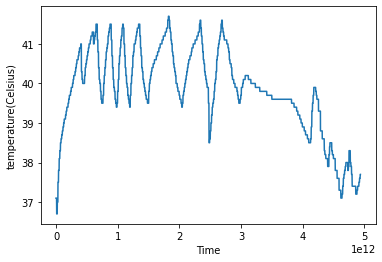

In [403]:
x = s21fe["time_elasped"]
y = s21fe["battery_temperature(Celsius)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("temperature(Celsius)")

S21 FE Time vs SOC Graph


Text(0, 0.5, 'Battery level')

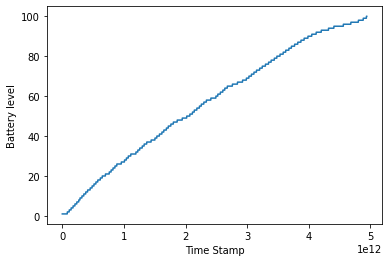

In [404]:
x = s21fe["time_elasped"]
y = s21fe["battery_percent"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Battery level")

Samsung A70 Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

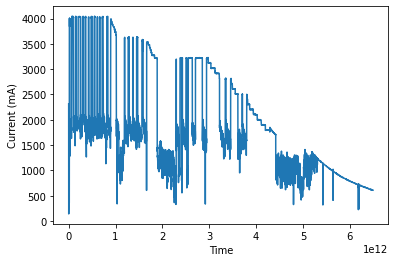

In [405]:
x = a70["time_elasped"]
y = a70["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Current (mA)")

Pixel 6A Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

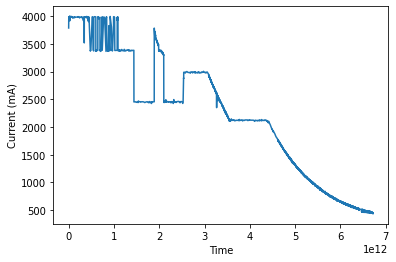

In [406]:
x = pixel6a["time_elasped"]
y = pixel6a["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Current (mA)")

Shape of all four phones


In [407]:
pixel6a.shape

(3034, 10)

In [408]:
a70.shape

(4684, 10)

In [409]:
s21fe.shape

(4326, 10)

In [410]:
pixel4a.shape

(2797, 10)

Max temp the phone reached while charging


In [411]:
print("A70 Max Temp", a70["battery_temperature(Celsius)"].max())
print("S21FE Max Temp", s21fe["battery_temperature(Celsius)"].max())
print("Pixel 6A Max Temp", pixel6a["battery_temperature(Celsius)"].max())
print("Pixel 4A Max Temp", pixel4a["battery_temperature(Celsius)"].max())

A70 Max Temp 40.1
S21FE Max Temp 41.7
Pixel 6A Max Temp 42.7
Pixel 4A Max Temp 41.4


Correlation


In [412]:
pixel6a.corr()

,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.870730,-0.842785,0.963742,-0.715188,0.964806,NaN
current(mA),-0.870730,1.000000,0.998297,-0.940408,0.919439,-0.938282,NaN
power(W),-0.842785,0.998297,1.000000,-0.921665,0.934455,-0.919165,NaN
battery_percent,0.963742,-0.940408,-0.921665,1.000000,-0.803125,0.999790,NaN
battery_temperature(Celsius),-0.715188,0.919439,0.934455,-0.803125,1.000000,-0.799799,NaN
remaining_battery_charge(mAh),0.964806,-0.938282,-0.919165,0.999790,-0.799799,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
a70.corr()

,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,0.089523,0.143877,0.796126,0.623885,0.794125,NaN
current(mA),0.089523,1.000000,0.998249,-0.491587,0.178653,-0.497182,NaN
power(W),0.143877,0.998249,1.000000,-0.442236,0.222217,-0.448133,NaN
battery_percent,0.796126,-0.491587,-0.442236,1.000000,0.548940,0.999433,NaN
battery_temperature(Celsius),0.623885,0.178653,0.222217,0.548940,1.000000,0.533648,NaN
remaining_battery_charge(mAh),0.794125,-0.497182,-0.448133,0.999433,0.533648,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [414]:
s21fe.corr()

,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.339324,-0.256339,0.921692,-0.382719,0.921835,NaN
current(mA),-0.339324,1.000000,0.995322,-0.601632,0.335730,-0.602592,NaN
power(W),-0.256339,0.995322,1.000000,-0.529183,0.330776,-0.530147,NaN
battery_percent,0.921692,-0.601632,-0.529183,1.000000,-0.409813,0.999938,NaN
battery_temperature(Celsius),-0.382719,0.335730,0.330776,-0.409813,1.000000,-0.408841,NaN
remaining_battery_charge(mAh),0.921835,-0.602592,-0.530147,0.999938,-0.408841,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [415]:
pixel4a.corr()

,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.725574,-0.670513,0.953388,-0.464185,0.958135,NaN
current(mA),-0.725574,1.000000,0.996129,-0.845376,0.606266,-0.847621,NaN
power(W),-0.670513,0.996129,1.000000,-0.797682,0.634150,-0.800653,NaN
battery_percent,0.953388,-0.845376,-0.797682,1.000000,-0.416518,0.999502,NaN
battery_temperature(Celsius),-0.464185,0.606266,0.634150,-0.416518,1.000000,-0.436934,NaN
remaining_battery_charge(mAh),0.958135,-0.847621,-0.800653,0.999502,-0.436934,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN
